In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('witout_petoh.csv')
data = data.drop(data.columns[0], axis = 1)
data

,Channel,TGS2602,TGS2620,TGS2610,MQ2,MQ4,MQ7,MQ8,MQ135
0,1.0,1.134746,1.120463,1.025424,1.063077,1.017172,0.999850,1.072222,0.733143
1,1.0,2.857923,1.208169,1.076923,1.058333,1.051685,0.999694,1.080357,0.962903
2,1.0,2.459722,1.212391,1.589965,1.093103,1.082759,0.998921,1.084211,0.787333
3,1.0,2.643147,1.214076,1.522000,1.089655,1.088795,0.999071,1.088393,0.833099
4,1.0,2.764835,1.222781,1.727881,1.041071,1.062500,1.000837,1.066667,0.925862
...,...,...,...,...,...,...,...,...,...
1102,9.0,2.497583,1.342457,1.871476,1.098148,1.124359,1.001990,1.135052,0.971930
1103,9.0,3.101132,1.352269,1.966554,1.152632,1.156579,0.998759,1.126804,1.050962
1104,9.0,3.153101,1.332099,1.707910,1.175000,1.163158,1.001247,1.141237,1.198889
1105,9.0,3.237500,1.360863,1.963636,1.173214,1.161842,1.000998,1.147423,0.897541


In [3]:
#Sensor selection
drop_sensor = ['MQ7', 'MQ135']
data = data.drop(drop_sensor, axis = 1)
data

,Channel,TGS2602,TGS2620,TGS2610,MQ2,MQ4,MQ8
0,1.0,1.134746,1.120463,1.025424,1.063077,1.017172,1.072222
1,1.0,2.857923,1.208169,1.076923,1.058333,1.051685,1.080357
2,1.0,2.459722,1.212391,1.589965,1.093103,1.082759,1.084211
3,1.0,2.643147,1.214076,1.522000,1.089655,1.088795,1.088393
4,1.0,2.764835,1.222781,1.727881,1.041071,1.062500,1.066667
...,...,...,...,...,...,...,...
1102,9.0,2.497583,1.342457,1.871476,1.098148,1.124359,1.135052
1103,9.0,3.101132,1.352269,1.966554,1.152632,1.156579,1.126804
1104,9.0,3.153101,1.332099,1.707910,1.175000,1.163158,1.141237
1105,9.0,3.237500,1.360863,1.963636,1.173214,1.161842,1.147423


In [4]:
#Data Scaling
X = data.drop(["Channel"],axis=1)
print(X)
Y = data["Channel"]
scaler = StandardScaler()
scaler.fit(X)
data_scaled = scaler.transform(X)

       TGS2602   TGS2620   TGS2610       MQ2       MQ4       MQ8
0     1.134746  1.120463  1.025424  1.063077  1.017172  1.072222
1     2.857923  1.208169  1.076923  1.058333  1.051685  1.080357
2     2.459722  1.212391  1.589965  1.093103  1.082759  1.084211
3     2.643147  1.214076  1.522000  1.089655  1.088795  1.088393
4     2.764835  1.222781  1.727881  1.041071  1.062500  1.066667
...        ...       ...       ...       ...       ...       ...
1102  2.497583  1.342457  1.871476  1.098148  1.124359  1.135052
1103  3.101132  1.352269  1.966554  1.152632  1.156579  1.126804
1104  3.153101  1.332099  1.707910  1.175000  1.163158  1.141237
1105  3.237500  1.360863  1.963636  1.173214  1.161842  1.147423
1106  3.247951  1.347214  1.894656  1.158929  1.125316  1.135052

[1107 rows x 6 columns]


In [5]:
#PCA
pca=PCA()
pca.fit(data_scaled)
df_pca= pca.transform(data_scaled)
df_pca = pd.DataFrame(data=df_pca)
df_pca["Channel"] = pd.DataFrame(data)["Channel"].reset_index(drop=True)
df_pca

,0,1,2,3,4,5,Channel
0,-1.103274,0.592989,0.160697,-0.503505,-0.233208,-0.052565,1.0
1,-0.214655,-0.651856,0.899411,-0.364732,-0.141393,0.102013,1.0
2,0.303357,-0.570002,-0.203026,-0.114091,-0.002505,0.010978,1.0
3,0.315764,-0.641770,0.016446,-0.107897,-0.016757,0.054930,1.0
4,0.353857,-1.030786,-0.388977,-0.029007,0.040054,0.139686,1.0
...,...,...,...,...,...,...,...
1102,1.171022,-0.772529,-0.668073,-0.576099,-0.013052,0.182181,9.0
1103,1.623852,-1.112463,-0.494854,-0.308467,0.130574,0.026837,9.0
1104,1.442848,-0.886047,0.052398,-0.338708,0.033731,-0.004284,9.0
1105,1.798746,-1.129535,-0.393347,-0.293564,0.045352,0.007507,9.0


In [6]:
#Explained variance ratio
variance_ratio = pca.explained_variance_ratio_
pca_sum = variance_ratio[0] + variance_ratio[1]
pca_sum

0.9409772376793274

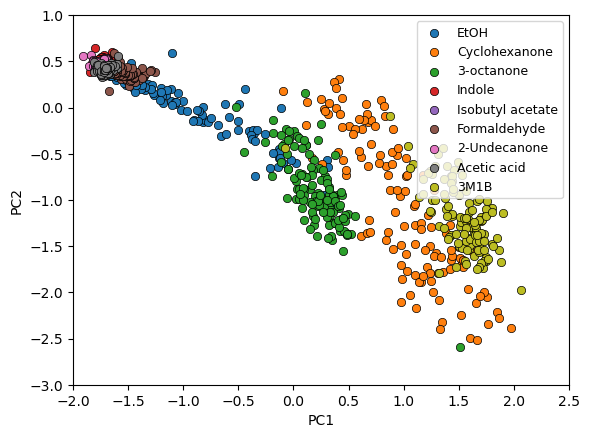

In [8]:
#PC1, PC2 result plot
for i, marker in enumerate(df_pca["Channel"]):

    x_val = df_pca[df_pca["Channel"] ==i+1][0] 
    
    y_val = df_pca[df_pca["Channel"]==i+1][1] 
    plt.scatter(x_val, y_val, edgecolors='#000000', linewidth=0.5) 
plt.legend(["EtOH", "Cyclohexanone", "3-octanone","Indole","Isobutyl acetate","Formaldehyde","2-Undecanone", "Acetic acid", "3M1B"], loc='upper right',fontsize = 9)#, bbox_to_anchor=(1, 0.35)) 
plt.xlabel("PC1") 
plt.ylabel("PC2") 
plt.xlim([-2,2.5])
plt.ylim([-3,1])
plt.show()